In [111]:
import pandas
import matplotlib.pyplot as Mp
import matplotlib.pyplot as pt
import numpy as num
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [112]:
Sheet = pandas.read_csv("SVMdataset.csv")
Sheet.head()

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [113]:
x=Sheet.iloc[:,:-1].values

In [114]:
y=Sheet.iloc[:,2].values

In [115]:
X_train, X_1, y_train, y_1 = train_test_split(x, y, test_size=0.4,random_state=42)

In [116]:
X_test, X_v, y_test, y_v = train_test_split(X_1, y_1, train_size=0.5,random_state=42)

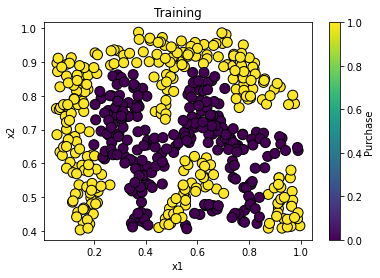

In [117]:
Mp.figure()
Mp.ylabel('x2')
Mp.xlabel('x1')
Mp.scatter(X_train[:,0],X_train[:,1],edgecolor='k',s = 100,c=y_train)
Mp.title('Training')
cbar= Mp.colorbar()
cbar.set_label("Purchase", labelpad=+1)
Mp.show()

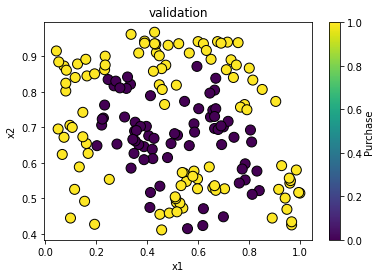

In [118]:
Mp.figure()
Mp.ylabel('x2')
Mp.xlabel('x1')
Mp.scatter(X_v[:,0],X_v[:,1],edgecolor='k',s = 100,c=y_v)
Mp.title('validation')
cbar= Mp.colorbar()
cbar.set_label("Purchase", labelpad=+1)
Mp.show()

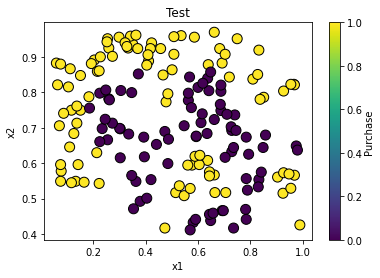

In [119]:
Mp.figure()
Mp.ylabel('x2')
Mp.xlabel('x1')
Mp.scatter(X_test[:,0],X_test[:,1],edgecolor='k',s = 100,c=y_test)
Mp.title('Test')
cbar= Mp.colorbar()
cbar.set_label("Purchase", labelpad=+1)
Mp.show()

In [120]:
zero=num.zeros(20)
v=0
b=1000
while v<20:
    zero[v]=b
    b=b/2
    v=v+1

In [121]:
best=1100
cf = SVC(kernel='linear',C =best)
cf.fit(X_train, y_train)
y_vp=cf.predict(X_v)
fbest =metrics.f1_score(y_v,y_vp)
for i in zero:
    cf = SVC(kernel='linear',C =i)
    cf.fit(X_train, y_train)
    y_vp=cf.predict(X_v)
    f1 =metrics.f1_score(y_v,y_vp)
    if fbest<f1:
        fbest=f1
        best=i
cf = SVC(kernel='linear',C =best)
cf.fit(X_train, y_train)

SVC(C=0.244140625, kernel='linear')

Confusion matrix for Training


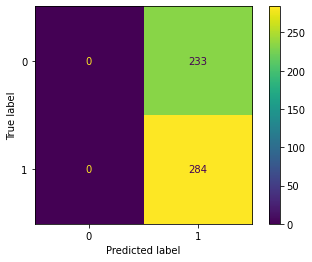

In [122]:
print("Confusion matrix for Training")
metrics.plot_confusion_matrix(cf, X_train, y_train)

Confusion matrix for Validation


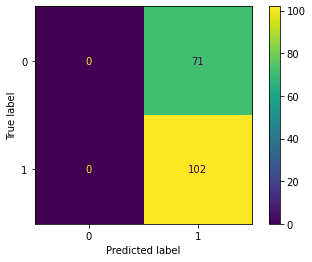

In [123]:
print('Confusion matrix for Validation')
metrics.plot_confusion_matrix(cf, X_v, y_v)

Confusion matrix for Test


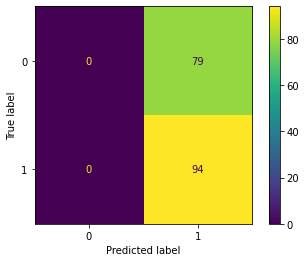

In [124]:
print("Confusion matrix for Test")
metrics.plot_confusion_matrix(cf, X_test, y_test)

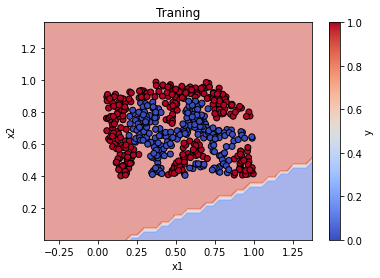

In [125]:
h = .04
x_min_t, x_max_t = X_train[:, 0].min() - 0.4, X_train[:, 0].max() + 0.4
y_min_t, y_max_t = X_train[:, 1].min() - 0.4, X_train[:, 1].max() + 0.4
x0, y0 = num.meshgrid(num.arange(x_min_t, x_max_t, h),num.arange(y_min_t, y_max_t, h))
pt.subplots_adjust(wspace=0.4, hspace=0.4)
w = cf.predict(num.c_[x0.ravel(), y0.ravel()])
w = w.reshape(x0.shape)
pt.contourf(x0, y0, w, cmap=pt.cm.coolwarm, alpha=0.5)
pt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,edgecolor='k', cmap=pt.cm.coolwarm)
pt.xlabel('x1')
pt.ylabel('x2')
cbar= Mp.colorbar()
cbar.set_label("y", labelpad=+1)
pt.title('Traning')
pt.show()

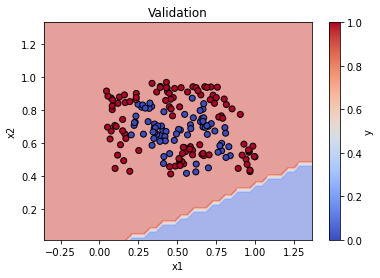

In [132]:
h = .04
x_min_t, x_max_t = X_v[:, 0].min() - 0.4, X_v[:, 0].max() + 0.4
y_min_t, y_max_t = X_v[:, 1].min() - 0.4, X_v[:, 1].max() + 0.4
x0, y0 = num.meshgrid(num.arange(x_min_t, x_max_t, h),num.arange(y_min_t, y_max_t, h))
pt.subplots_adjust(wspace=0.4, hspace=0.4)
w = cf.predict(num.c_[x0.ravel(), y0.ravel()])
w = w.reshape(x0.shape)
pt.contourf(x0, y0, w, cmap=pt.cm.coolwarm, alpha=0.5)
pt.scatter(X_v[:, 0], X_v[:, 1], c=y_v,edgecolor='k', cmap=pt.cm.coolwarm)
pt.xlabel('x1')
pt.ylabel('x2')
cbar= Mp.colorbar()
cbar.set_label("y", labelpad=+1)
pt.title('Validation')
pt.show()

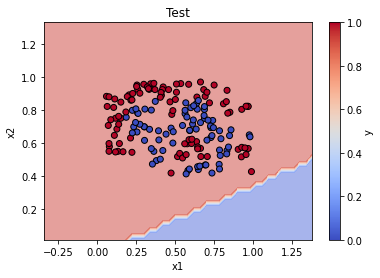

In [134]:
h = .04
x_min_t, x_max_t = X_test[:, 0].min() - 0.4, X_test[:, 0].max() +0.4
y_min_t, y_max_t = X_test[:, 1].min() - 0.4, X_test[:, 1].max() + 0.4
x0, y0 = num.meshgrid(num.arange(x_min_t, x_max_t, h),num.arange(y_min_t, y_max_t, h))
pt.subplots_adjust(wspace=0.4, hspace=0.4)
w = cf.predict(num.c_[x0.ravel(), y0.ravel()])
w = w.reshape(x0.shape)
pt.contourf(x0, y0, w, cmap=pt.cm.coolwarm, alpha=0.5)
pt.scatter(X_test[:, 0], X_test[:, 1], c=y_test,edgecolor='k', cmap=pt.cm.coolwarm)
pt.xlabel('x1')
pt.ylabel('x2')
cbar= Mp.colorbar()
cbar.set_label("y", labelpad=+1)
pt.title('Test')
pt.show()

In [128]:
print('Trainig')
y_p=cf.predict(X_train)
Accuracy =metrics.accuracy_score(y_train,y_p)
print("Accuracy = ",Accuracy)
recall=metrics.recall_score(y_train,y_p)
print("recall = " , recall)
F1_score =metrics.f1_score(y_train,y_p)
print("F1 score = ",F1_score)
precision =metrics.precision_score(y_train,y_p)
print("Precision = ",precision)

Trainig
Accuracy =  0.5493230174081238
recall =  1.0
F1 score =  0.7091136079900126
Precision =  0.5493230174081238


In [129]:
print('Test')
Y_predicit_test=cf.predict(X_test)
Accuracy  =metrics.accuracy_score(y_test,Y_predicit_test)
print("Accuracy = ",Accuracy)
recall=metrics.recall_score(y_test,Y_predicit_test)
print("recall = " , recall)
F1_score =metrics.f1_score(y_test,Y_predicit_test)
print("F1 score = ",F1_score)
precision =metrics.precision_score(y_test,Y_predicit_test)
print("Precision = ",precision)

Test
Accuracy =  0.5433526011560693
recall =  1.0
F1 score =  0.7041198501872659
Precision =  0.5433526011560693


In [130]:
print('Validation')
Y_v=cf.predict(X_v)
Accuracy =metrics.accuracy_score(y_v,Y_v)
print("Accuracy = ",Accuracy)
recall=metrics.recall_score(y_v,Y_v)
print("recall = " , recall)
F1_score=metrics.f1_score(y_v,Y_v)
print("F1 score = ",F1_score)
precision =metrics.precision_score(y_v,Y_v)
print("Precision = ",precision)

Validation
Accuracy =  0.5895953757225434
recall =  1.0
F1 score =  0.7418181818181818
Precision =  0.5895953757225434
